# 泰坦尼克号数据探索

## 有哪些因素会让船上的人生还率更高？

### 1、根据性别与船票级别分析生还率
### 2、根据上船地点分析生还率

In [23]:
#读取数据
import pandas as pd
titanic_data = pd.read_csv('titanic-data.csv')

In [24]:
#清理缺失数据和不需要的列
titanic_data.info()
titanic_data = titanic_data.drop('Cabin', axis=1)
titanic_data = titanic_data.dropna(axis=0)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object

Populating the interactive namespace from numpy and matplotlib
Sex
female    195
male       93
Name: Survived, dtype: int64
Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


([<matplotlib.patches.Wedge at 0xcb0f6d8>,
 [<matplotlib.text.Text at 0xcb0fc18>, <matplotlib.text.Text at 0xcbc18d0>],
 [<matplotlib.text.Text at 0xcb0ff98>, <matplotlib.text.Text at 0xcbc1be0>])

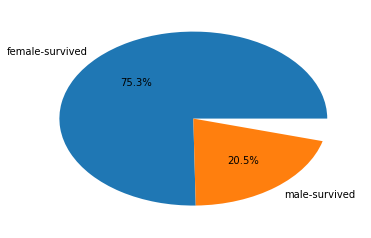

In [9]:
#根据性别生还率
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data_sex = titanic_data.groupby(['Sex'])
titanic_data_sex_sum = titanic_data_sex.sum()['Survived']
titanic_data_sex_count = titanic_data_sex.count()['Survived']
print titanic_data_sex_sum
servived_rate_sex = titanic_data_sex_sum / titanic_data_sex_count
print servived_rate_sex 
plt.pie(servived_rate_sex, labels=['female-survived','male-survived'], autopct='%.1f%%')

### 根据性别分类，男性生还率是20.5%,女性是75.3%。

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64
Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


([<matplotlib.patches.Wedge at 0xcf19fd0>,
  <matplotlib.text.Text at 0xd9ab128>])

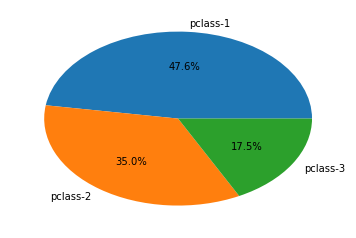

In [12]:
#根据船票登记生还率
titanic_data_pclass = titanic_data.groupby(['Pclass'])
titanic_data_pclass_sum = titanic_data_pclass.sum()['Survived']
titanic_data_pclass_count = titanic_data_pclass.count()['Survived']
print titanic_data_pclass_sum
servived_rate_pclass = titanic_data_pclass_sum / titanic_data_pclass_count
print servived_rate_pclass 
plt.pie(servived_rate_pclass, labels=['pclass-1','pclass-2','pclass-3'], autopct='%.1f%%')

### 根据船票登记分类，一等票的人生还率是47.6%，二等票的是35%，三等票的是17.5%。

In [16]:
#根据性别和船票登记的生还人数
titanic_data_gb_sex_pclass = titanic_data.groupby(['Sex', 'Pclass'])
titanic_data_gb_sex_pclass_sum = titanic_data_gb_sex_pclass.sum()['Survived']
print titanic_data_gb_sex_pclass_sum
#男女总人数
titanic_data_gb_sex_count = titanic_data_gb_sex_pclass.count()['Survived']
print titanic_data_gb_sex_count
#生还率
servived_rate_sex_pclass = titanic_data_gb_sex_pclass_sum / titanic_data_gb_sex_count
print servived_rate_sex_pclass 

Sex     Pclass
female  1         80
        2         68
        3         47
male    1         40
        2         15
        3         38
Name: Survived, dtype: int64
Sex     Pclass
female  1          83
        2          74
        3         102
male    1         101
        2          99
        3         253
Name: Survived, dtype: int64
Sex     Pclass
female  1         0.963855
        2         0.918919
        3         0.460784
male    1         0.396040
        2         0.151515
        3         0.150198
Name: Survived, dtype: float64


Populating the interactive namespace from numpy and matplotlib


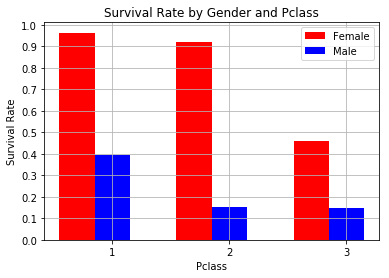

In [18]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

x=np.array([1,2,3])  
width=0.3 
#男女生还率柱状图
plt.bar(x-width,servived_rate_sex_pclass.female,width,color='r')  
plt.bar(x,servived_rate_sex_pclass.male,width,color='b') 
#标题
plt.title('Survival Rate by Gender and Pclass')
#x轴标签
plt.xlabel('Pclass')  
#y轴标签
plt.ylabel('Survival Rate')  
#x轴刻度
plt.xticks([1,2,3])  
#y轴刻度
plt.yticks(np.arange(0.0, 1.1, 0.1)) 
#背景格子
plt.grid(True,linestyle='-',color='0.7')  
#指示图
plt.legend(['Female','Male'])  
plt.show()  

### 1、女性生还率无论船票级别总体比男性要高，体现“女士优先”这一社会现象。在生还率中，生还率与船票等级正相关。

In [19]:
#根据上船地点分析生还率
titanic_data_embark = titanic_data.groupby(['Embarked'])
print titanic_data_embark

In [20]:
titanic_data_embark_sur_sum = titanic_data_embark.sum()['Survived']
titanic_data_embark_sur_count = titanic_data_embark.count()['Survived']
embark_sur_rate = titanic_data_embark_sur_sum / titanic_data_embark_sur_count
print titanic_data_embark_sur_sum
print titanic_data_embark_sur_count
print embark_sur_rate

Embarked
C     79
Q      8
S    201
Name: Survived, dtype: int64
Embarked
C    130
Q     28
S    554
Name: Survived, dtype: int64
Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


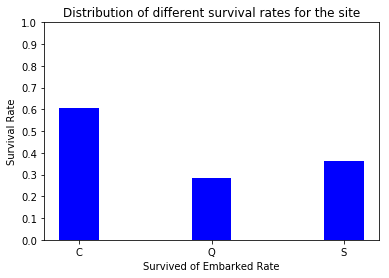

In [21]:
plt.xlabel('Survived of Embarked Rate')
plt.title('Distribution of different survival rates for the site' )
x=np.array([1,2,3])  
plt.bar(x,embark_sur_rate,width,color='b') 
plt.xticks([1,2,3],["C","Q","S"]) 
plt.ylabel('Survival Rate') 
plt.yticks(np.arange(0.0, 1.1, 0.1)) 
plt.show()

### 2、根据上船港口不同生还率如下：港口Cherbourg >Queenstown > Southampton

# 结论
## 该样本总共有891条，经过删除丢失值和不需要使用的值，样本总数为712条，占原数据量的80%，足够说明问题。
## 在数据集中未体现当时发生海难时乘客的具体位置以及当时船上是否有大型聚会和活动及其参加者的生还率。这些都是会生还率的因素。
